In [1]:
import numpy as np
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline

## 5.1 1차원 이산형 확률변수

### 5.1.1 1차원 이산형 확률변수의 정의

+ 확률질량함수

In [2]:
x_set = np.array([1, 2, 3, 4, 5, 6])

In [3]:
def f(x):
    if x in x_set:
        return x / 21
    else:
        return 0

In [4]:
X = [x_set, f]

In [5]:
# 확률 p_k를 구한다
prob = np.array([f(x_k) for x_k in x_set])

# x_k와 p_k의 대응을 사전식으로 표시
dict(zip(x_set, prob))

{1: 0.047619047619047616,
 2: 0.09523809523809523,
 3: 0.14285714285714285,
 4: 0.19047619047619047,
 5: 0.23809523809523808,
 6: 0.2857142857142857}

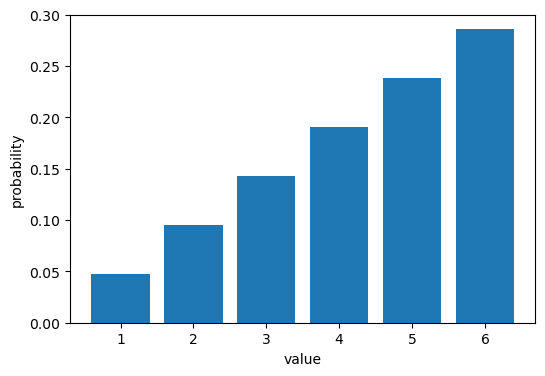

In [6]:
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)
ax.bar(x_set, prob)
ax.set_xlabel('value')
ax.set_ylabel('probability')

plt.show()

+ 확률의 성질

In [7]:
np.all(prob>=0)

True

In [8]:
np.sum(prob)

0.9999999999999999

+ 확률변수의 변환

In [9]:
y_set = np.array([2*x_k+3 for x_k in x_set])
prob = np.array([f(x_k) for x_k in x_set])
dict(zip(y_set, prob))

{5: 0.047619047619047616,
 7: 0.09523809523809523,
 9: 0.14285714285714285,
 11: 0.19047619047619047,
 13: 0.23809523809523808,
 15: 0.2857142857142857}

### 5.1.2 1차원 이산형 확률변수의 지표

+ 기댓값

In [10]:
np.sum([x_k * f(x_k) for x_k in x_set])

4.333333333333333

In [11]:
sample = np.random.choice(x_set, int(1e6), p=prob)
np.mean(sample)

4.332247

In [12]:
def E(X, g=lambda x: x):
    x_set, f = X
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])

In [13]:
E(X)

4.333333333333333

In [14]:
E(X, g=lambda x: 2*x + 3)

11.666666666666664

In [15]:
2 * E(X) + 3

11.666666666666666

+ 분산

In [16]:
mean = E(X)
np.sum([(x_k - mean)**2 * f(x_k) for x_k in x_set])

2.2222222222222223

In [17]:
def V(X, g=lambda x: x):
    x_set, f = X
    mean = E(X, g)
    return np.sum([(g(x_k) - mean)**2 * f(x_k) for x_k in x_set])

In [18]:
V(X)

2.2222222222222223

In [19]:
V(X, lambda x: 2*x + 3)

8.88888888888889

In [20]:
2**2 * V(X)

8.88888888888889

## 5.2 2차원 이산형 확률변수

### 5.2.1 2차원 이산형 확률변수의 정의

+ 결합확률분포

+ 확률의 성질

In [24]:
x_set = np.arange(2, 13)
y_set = np.arange(1, 7)

In [25]:
def f_XY(x, y):
    if 1 <= y <= 6 and 1 <= x-y <= 6:
        return y * (x-y) / 441
    else:
        return 0

In [28]:
XY = [x_set, y_set, f_XY]

In [48]:
prob.shape

(11, 6)

[[0.002 0.    0.    0.    0.    0.   ]
 [0.005 0.005 0.    0.    0.    0.   ]
 [0.007 0.009 0.007 0.    0.    0.   ]
 [0.009 0.014 0.014 0.009 0.    0.   ]
 [0.011 0.018 0.02  0.018 0.011 0.   ]
 [0.014 0.023 0.027 0.027 0.023 0.014]
 [0.    0.027 0.034 0.036 0.034 0.027]
 [0.    0.    0.041 0.045 0.045 0.041]
 [0.    0.    0.    0.054 0.057 0.054]
 [0.    0.    0.    0.    0.068 0.068]
 [0.    0.    0.    0.    0.    0.082]]


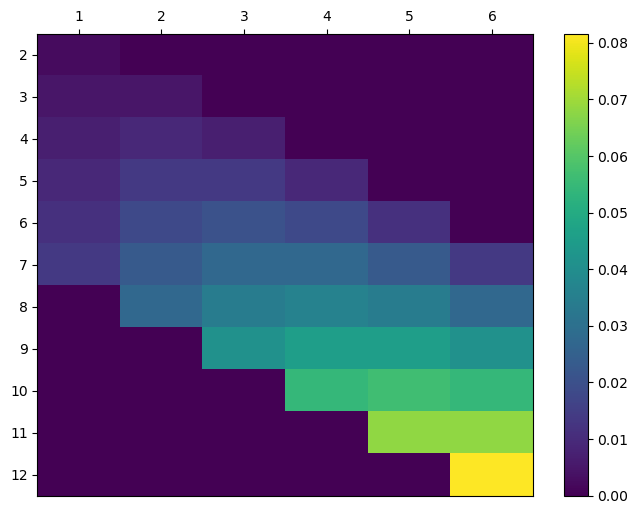

In [38]:
prob = np.array([[f_XY(x_i, y_j) for y_j in y_set] for x_i in x_set])
print(prob)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

c = ax.pcolor(prob)
ax.set_xticks(np.arange(prob.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(prob.shape[0]) + 0.5, minor=False)
ax.set_xticklabels(np.arange(1, 7), minor=False)
ax.set_yticklabels(np.arange(2, 13), minor=False)

# y축을 내림차순의 숫자가 되게 하여 위 아래를 역전시킨다.
ax.invert_yaxis()

# x축 눈금을 그래프 위쪽에 표시
ax.xaxis.tick_top()

fig.colorbar(c, ax=ax)
plt.show()

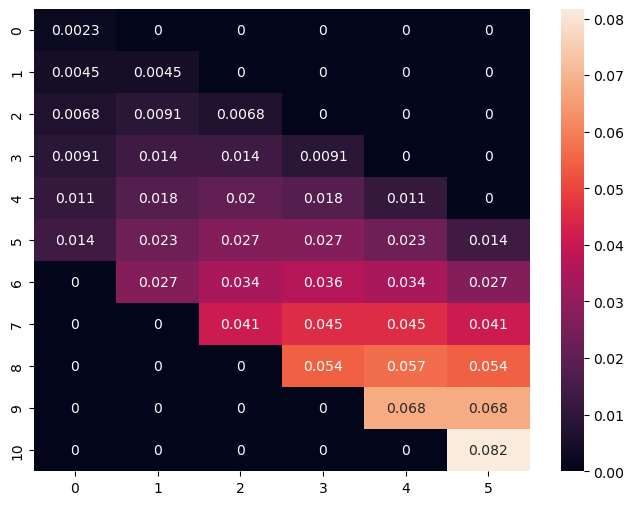

In [47]:
import seaborn as sns

fig, ax = plt.subplots(1, 1, figsize=(8, 6))

sns.heatmap(prob, annot=True)
plt.show()

In [52]:
np.all(prob >= 0)

True

In [53]:
np.sum(prob)

1.0

+ 주변확률분포

In [54]:
def f_X(x):
    return np.sum([f_XY(x, y_k) for y_k in y_set])

In [55]:
def f_Y(y):
    return np.sum([f_XY(x_k, y) for x_k in x_set])

In [56]:
X = [x_set, f_X]
Y = [y_set, f_Y]

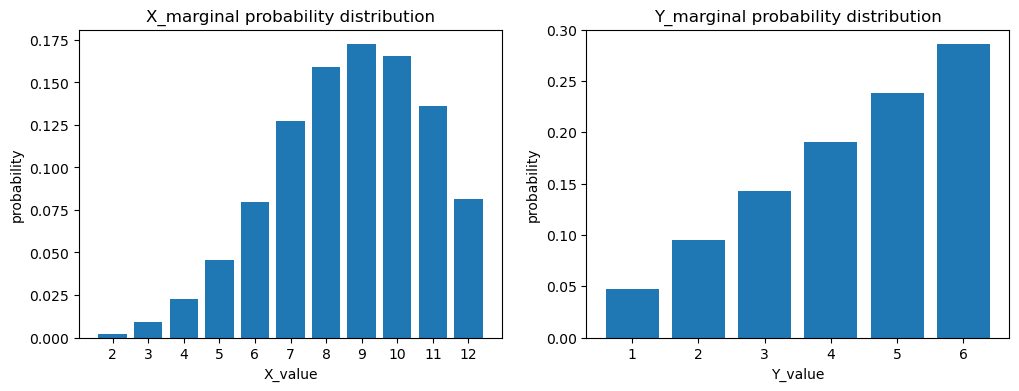

In [58]:
prob_x = np.array([f_X(x_k) for x_k in x_set])
prob_y = np.array([f_Y(y_k) for y_k in y_set])

fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.bar(x_set, prob_x)
ax1.set_title('X_marginal probability distribution')
ax1.set_xlabel('X_value')
ax1.set_ylabel('probability')
ax1.set_xticks(x_set)

ax2.bar(y_set, prob_y)
ax2.set_title('Y_marginal probability distribution')
ax2.set_xlabel('Y_value')
ax2.set_ylabel('probability')

plt.show()

### 5.2.2 2차원 이산형 확률분포의 지표